In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as linalg

In [177]:
#Creating function
def getDataMatrix(x, degree):
    #reutrns an array with a new shape
    X = np.ones(x.shape)
    #iterating until the number of the degree + 1
    for i in range(1, degree + 1):
        #staking 1d arrays into a 2d arrays
        X  = np.column_stack((X, x ** i))
    return X

In [178]:
def pol_regression(features_train, y_train, degree):
    #calling function and assigning it to the variable x
    X = getDataMatrix(features_train, degree)
    #transposing and using the .dot() function with the variable x
    XX = X.transpose().dot(X)
    #calculating the parameters
    parameters = np.linalg.solve(XX, X.transpose().dot(y_train))
    
    return parameters

In [179]:
data = pd.read_csv("Task1 - dataset - pol_regression.csv")
data

,Unnamed: 0,x,y
0,0,0.507979,2.238321
1,1,2.081478,-13.104269
2,2,-2.090953,-10.895881
3,3,0.108276,-1.580098
4,4,3.929470,9.174928
5,5,3.962931,3.237086
6,6,-3.744147,-72.556875
7,7,-2.927571,-29.934683
8,8,-4.485328,-125.275943
9,9,-0.591902,1.586948


In [212]:
#Splitting the data into x and y based on the two columns in the data
X = data['x']
y = data['y']
#sorting the data
X = np.sort(X, 0)

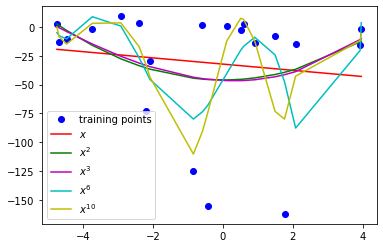

In [213]:
plt.figure()
#plottin data points
plt.plot(X, y, 'bo')

#plotting the line with the degree as 1
w1 = pol_regression(X, y, 1)
Xtest1 = getDataMatrix(X, 1)
ytest1 = Xtest1.dot(w1)
plt.plot(X, ytest1, 'r')

#plotting the line with degree as 2
w2 = pol_regression(X, y, 2)
Xtest2 = getDataMatrix(X, 2)
ytest2 = Xtest2.dot(w2)
plt.plot(X, ytest2, 'g')

#plotting the line with the degree as 3
w3 = pol_regression(X, y, 3)
Xtest3 = getDataMatrix(X, 3)
ytest3 = Xtest3.dot(w3)
plt.plot(X, ytest3, 'm')

#plotting the line with the degree as 6
w4 = pol_regression(X, y, 6)
Xtest4 = getDataMatrix(X, 6)
ytest4 = Xtest4.dot(w4)
plt.plot(X, ytest4, 'c')

#plotting the line withh the degree as 10
w5 = pol_regression(X, y, 10)
Xtest5 = getDataMatrix(X, 10)
ytest5 = Xtest5.dot(w5)
plt.plot(X, ytest5,  'y')

plt.legend(('training points', '$x$', '$x^2$', '$x^3$', '$x^6$', '$x^1$$^0$'))




In [205]:
def eval_pol_regression(parameters, x, y, degree):
    #calling the function
    xTest = getDataMatrix(x, degree)
    #calculating the prediction
    yPredict = xTest.dot(parameters)
    
#calculating the mean squared error
    MSE = np.square(np.subtract(y, yPredict)).mean()
    #calculating root mean squared error
    RMSE = np.sqrt(MSE)
    
    return RMSE
    

In [192]:
from sklearn.model_selection import train_test_split
# creating train and test data with a 70-30 split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14,)
(6,)
(14,)
(6,)


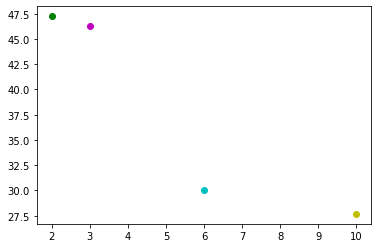

In [210]:
wTrain2 = pol_regression(x_train, y_train, 2)
#calculating RMSE for train data with the degrees as 2
train2 = eval_pol_regression(wTrain2, x_train, y_train, 2)
#calculating RMSE for test data with the degrees as 2
test2 = eval_pol_regression(wTrain2, x_test, y_test, 2)
#plotting train data for degree 2
plt.plot(2, train2,  'go')

wTrain3 = pol_regression(x_train, y_train, 3)
#calculating RMSE for train data with the degrees as 3
train3 = eval_pol_regression(wTrain3, x_train, y_train, 3)
#calculating RMSE for test data with the degrees as 3
test3 = eval_pol_regression(wTrain3, x_test, y_test, 3)
#plotting train data for degree 3
plt.plot(3, train3,  'mo')

wTrain4 = pol_regression(x_train, y_train, 6)
#calculating RMSE for train data with the degrees as 6
train4 = eval_pol_regression(wTrain4, x_train, y_train, 6)
#calculating RMSE for test data with the degrees as 6
test4 = eval_pol_regression(wTrain4, x_test, y_test, 6)
#plotting train data for degree 6
plt.plot(6, train4,  'co')

wTrain5 = pol_regression(x_train, y_train, 10)
#calculating RMSE for train data with the degrees as 10
train5 = eval_pol_regression(wTrain5, x_train, y_train, 10)
#calculating RMSE for test data with the degrees as 10
test5 = eval_pol_regression(wTrain5, x_test, y_test, 10)
#plotting train data for degree 10
plt.plot(10, train5,  'yo')



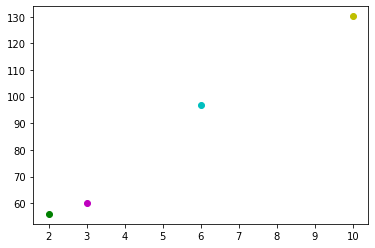

In [211]:
#plotting for test data 
plt.plot(2, test2,  'go')
plt.plot(3, test3,  'mo')
plt.plot(6, test4,  'co')
plt.plot(10, test5,  'yo')

In [142]:
def assign_clusters(centroids, dataset):
    #creating an array
    clusters = []
    
    #Looping the length of the dataset shape
    for i in range(dataset.shape[0]):
        #creating an array
        distances = []
        #looping through centroids
        for centroid in centroids:
            #calling the eclidean distance and the result is appended to the distances array
            distances.append(compute_euclidean_distance(centroid, dataset[i]))
        #adding values to clusters array
        cluster = [z for z, val in enumerate(distances) if val == min(distances)]
        clusters.append(cluster[0])
        
    
    
    return clusters

In [88]:
def compute_euclidean_distance(vec_1, vec_2):
    #calculating euclidean distance
    distance = (sum(vec_1 - vec_2)**2)**0.5
    
    return distance

In [146]:
def initialise_centroids(dataset, k):
    #creating centroids array
    centroids = []
    #concatenating arrays together
    cluster_df = pd.concat([pd.DataFrame(dataset), pd.DataFrame(k, columns=['cluster'])], axis=1)
    #looping through the concatenated arrays
    for c in set(cluster_df['cluster']):
        #assigning the currentcluster to a variable
        current_cluster = cluster_df[cluster_df.columns[:-1]]
        getting the mean of the clusters
        cluster_mean = current_cluster.mean(axis=0)
        #appending the mean cluster to the centroids
        centroids.append(cluster_mean)
    
    
    return centroids

In [127]:
def kmeans(dataset, k):
    #assigning values to centroids array
    centroids = [dataset[i+2] for i in range(k)]
    #Using clusters array function and assigning it to a variable 
    cluster_assigned = assign_clusters(centroids, dataset)
    #looping through to 20
    for i in range(20):
        #calling initialise centroids function
        centroids = initialise_centroids(dataset, cluster_assigned)
        #calling assign cluster function
        cluster_assigned = assign_clusters(centroids, dataset)

    return centroids, cluster_assigned

In [171]:
#reading csv file
df = pd.read_csv("Task2 - dataset - dog_breeds.csv")
#copying height and leg length to a variable 
df2 = df[['height', 'leg length']].copy(deep=True)
df2.dropna(axis=0, inplace=True)
#sorting alues
df2.sort_values(by=['height', 'leg length'], inplace=True)
#creating a numpy array
dataset = np.array(df2)


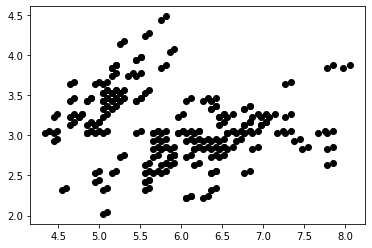

In [112]:
plt.plot(df2['height'], df2['tail length'],'ko')

In [165]:
#Task 3

#importing file as df
df = pd.read_csv("Task3 - dataset - HIV RVG.csv")
#outputting file
df

,Image number,Bifurcation number,Artery (1)/ Vein (2),Alpha,Beta,Lambda,Lambda1,Lambda2,Participant Condition
0,1,1,1,0.600099,2.141185,0.774660,1.156788,0.896118,Patient
1,1,2,1,0.822612,1.835858,0.906980,1.003627,0.910269,Patient
2,1,3,1,0.862658,1.770032,0.928794,0.974819,0.905406,Patient
3,1,4,1,0.807950,1.373153,0.898860,0.871498,0.783355,Patient
4,1,5,1,0.742544,1.332164,0.861710,0.874353,0.753439,Patient
...,...,...,...,...,...,...,...,...,...
3209,203,3,2,0.180108,1.133420,0.424391,0.980019,0.415912,Patient
3210,203,4,2,0.791547,1.386333,0.889690,0.879670,0.782633,Patient
3211,203,5,2,0.232715,1.190652,0.482406,0.982791,0.474104,Patient
3212,203,6,2,0.746027,1.183473,0.863729,0.823292,0.711101,Patient


In [166]:
#Dropping the column with string value in order to get mean,min and max values
df2 = df.drop('Participant Condition', axis = 1)
df2

,Image number,Bifurcation number,Artery (1)/ Vein (2),Alpha,Beta,Lambda,Lambda1,Lambda2
0,1,1,1,0.600099,2.141185,0.774660,1.156788,0.896118
1,1,2,1,0.822612,1.835858,0.906980,1.003627,0.910269
2,1,3,1,0.862658,1.770032,0.928794,0.974819,0.905406
3,1,4,1,0.807950,1.373153,0.898860,0.871498,0.783355
4,1,5,1,0.742544,1.332164,0.861710,0.874353,0.753439
...,...,...,...,...,...,...,...,...
3209,203,3,2,0.180108,1.133420,0.424391,0.980019,0.415912
3210,203,4,2,0.791547,1.386333,0.889690,0.879670,0.782633
3211,203,5,2,0.232715,1.190652,0.482406,0.982791,0.474104
3212,203,6,2,0.746027,1.183473,0.863729,0.823292,0.711101


In [16]:
#Outputting mean of each column
df2.mean()

Image number            107.355009
Bifurcation number        6.220597
Artery (1)/ Vein (2)      1.573118
Alpha                     0.615305
Beta                      1.556093
Lambda                    0.765141
Lambda1                   0.981465
Lambda2                   0.741929
dtype: float64

In [17]:
#Outputting minimum values of each column
df2.min()

Image number            1.000000
Bifurcation number      1.000000
Artery (1)/ Vein (2)    1.000000
Alpha                   0.092770
Beta                    0.283299
Lambda                  0.304582
Lambda1                 0.390920
Lambda2                 0.309526
dtype: float64

In [18]:
#Outputting maximum values of each column
df2.max()

Image number            203.000000
Bifurcation number       25.000000
Artery (1)/ Vein (2)      2.000000
Alpha                     2.356406
Beta                      3.376731
Lambda                    1.535059
Lambda1                   1.467637
Lambda2                   1.246102
dtype: float64

In [19]:
#Using mean normalisation
df2_norm = (df2 - df2.mean())/df2.std()

df2 = pd.DataFrame(df2_norm)
df2

,Image number,Bifurcation number,Artery (1)/ Vein (2),Alpha,Beta,Lambda,Lambda1,Lambda2
0,-1.804670,-1.272280,-1.158511,-0.057331,1.509035,0.055075,1.343552,0.968492
1,-1.804670,-1.028576,-1.158511,0.781567,0.721553,0.820634,0.169836,1.057382
2,-1.804670,-0.784872,-1.158511,0.932545,0.551780,0.946844,-0.050928,1.026835
3,-1.804670,-0.541168,-1.158511,0.726288,-0.471828,0.773656,-0.842709,0.260203
4,-1.804670,-0.297464,-1.158511,0.479702,-0.577545,0.558716,-0.820827,0.072296
...,...,...,...,...,...,...,...,...
3209,1.622939,-0.784872,0.862908,-1.640738,-1.090133,-1.971472,-0.011078,-2.047785
3210,1.622939,-0.541168,0.862908,0.664450,-0.437835,0.720598,-0.780086,0.255670
3211,1.622939,-0.297464,0.862908,-1.442403,-0.942522,-1.635818,0.010162,-1.682266
3212,1.622939,-0.053760,0.862908,0.492834,-0.961039,0.570397,-1.212127,-0.193640


In [20]:
status = df['Participant Condition']
#Appending the participantcondition back onto the normalised data
df2 = df2.join(status)

In [21]:
df2

,Image number,Bifurcation number,Artery (1)/ Vein (2),Alpha,Beta,Lambda,Lambda1,Lambda2,Participant Condition
0,-1.804670,-1.272280,-1.158511,-0.057331,1.509035,0.055075,1.343552,0.968492,Patient
1,-1.804670,-1.028576,-1.158511,0.781567,0.721553,0.820634,0.169836,1.057382,Patient
2,-1.804670,-0.784872,-1.158511,0.932545,0.551780,0.946844,-0.050928,1.026835,Patient
3,-1.804670,-0.541168,-1.158511,0.726288,-0.471828,0.773656,-0.842709,0.260203,Patient
4,-1.804670,-0.297464,-1.158511,0.479702,-0.577545,0.558716,-0.820827,0.072296,Patient
...,...,...,...,...,...,...,...,...,...
3209,1.622939,-0.784872,0.862908,-1.640738,-1.090133,-1.971472,-0.011078,-2.047785,Patient
3210,1.622939,-0.541168,0.862908,0.664450,-0.437835,0.720598,-0.780086,0.255670,Patient
3211,1.622939,-0.297464,0.862908,-1.442403,-0.942522,-1.635818,0.010162,-1.682266,Patient
3212,1.622939,-0.053760,0.862908,0.492834,-0.961039,0.570397,-1.212127,-0.193640,Patient


<AxesSubplot:xlabel='Participant Condition', ylabel='Alpha'>

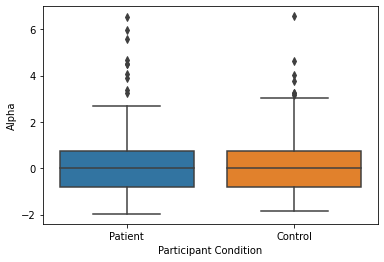

In [22]:
#importing the seaborn library in orderto plot the graphs
import seaborn as sns 
#plotting the boxplot wit participant condition as the x axis and alpha as the y
sns.boxplot(x= 'Participant Condition', y= 'Alpha', data= df2)

<AxesSubplot:xlabel='Beta', ylabel='Density'>

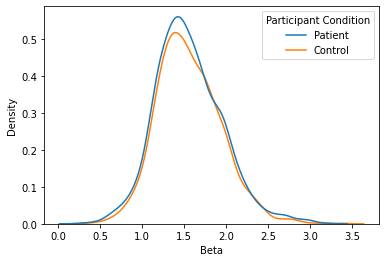

In [23]:
#Plotting the density plot with beta along the x axis
sns.kdeplot(data=df, x = 'Beta', hue= 'Participant Condition')

In [24]:
#Assigning all columns apart from particpant condition to the varaible x
x = df2[['Image number', 'Bifurcation number', 'Artery (1)/ Vein (2)', 'Alpha', 'Beta', 'Lambda', 'Lambda1', 'Lambda2']]


In [25]:
#Importing pre preocessing from sklearn
from sklearn import preprocessing
#Assignning participant condition to the variable y
y = df2["Participant Condition"]
#Outputting the first 5 y values
y[0:5]

0    Patient
1    Patient
2    Patient
3    Patient
4    Patient
Name: Participant Condition, dtype: object

In [26]:
#importing shuffle from sklearn inorder to shuffle the data
from sklearn.utils import shuffle
#Shuffling both x and y
x, y = shuffle(x,y, random_state = 0)

In [27]:
#Outputting the first 5 values in the new shuffled data
print(y[0:5])

2568    Control
2200    Patient
306     Patient
831     Patient
2781    Control
Name: Participant Condition, dtype: object


In [28]:
#impoorting train test split inorder to split the data into training and testing
from sklearn.model_selection import train_test_split
#Splitting the data into 90% training 10% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
#Printing the shape of x and y train and test
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2892, 8)
(322, 8)
(2892,)
(322,)


In [29]:
#importing both metrics and MLPClassifier from sklearn
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
#creating a function fro the artificial neural networktaking the number of epochs as a parameter
def ann(epochs):
    
    mlp = MLPClassifier(hidden_layer_sizes=(500,500), activation='logistic', solver= 'adam',  max_iter=epochs)
    mlp.fit(x_train, y_train)

    predicted = mlp.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, predicted)
    
    return accuracy

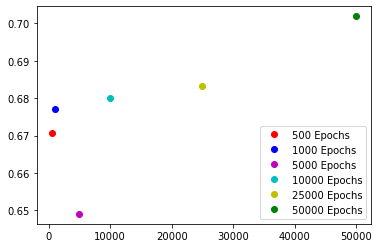

In [30]:
plt.figure()
#outputting a graph with the number of epochs on the x axis and the accuracy on the y
epochs1 = 500
accuracy1 = ann(epochs1)
plt.plot(epochs1, accuracy1, 'ro')

epochs2 = 1000
accuracy2 = ann(epochs2)
plt.plot(epochs2, accuracy2, 'bo')

epochs3 = 5000
accuracy3 = ann(epochs3)
plt.plot(epochs3, accuracy3, 'mo')

epochs4 = 10000
accuracy4 = ann(epochs4)
plt.plot(epochs4, accuracy4, 'co')

epochs5 = 25000
accuracy5 = ann(epochs5)
plt.plot(epochs5, accuracy5, 'yo')

epochs6 = 50000
accuracy6 = ann(epochs6)
plt.plot(epochs6, accuracy6, 'go')

plt.legend(('500 Epochs', '1000 Epochs', '5000 Epochs', '10000 Epochs', '25000 Epochs', '50000 Epochs'))

plt.savefig('ann.png')


In [31]:
#Importing random forest classifier from sklearn
from sklearn.ensemble import RandomForestClassifier
#creating a function for the random forest classifier taking the minimum number of samples to be a leaf node as the parameter
def rfc(samples):
# Assinging the random forest classifier to the variable clf with the number of tress as 100 and the min sample leaf as the parameter taking in from the function
    clf = RandomForestClassifier(n_estimators=1000, min_samples_leaf=samples)
    #Training the classifier using the x and y training data
    clf.fit(x_train, y_train)
    #predicitng using the x tesst data
    predicted = clf.predict(x_test)
    #calculating the accuracy using the y test data and the predicted values
    accuracy = metrics.accuracy_score(y_test, predicted)
    #return the accuracy value
    return accuracy
    

In [42]:
# printing the accuracy values by calling the rfc function and using 5 and 10 as the min samples leaf
print("\nAccuracy with 5 as the minimum number of samples to be a leaf node: ", rfc(5))
print("\nAccuracy with 10 as the minimum number of samples to be a leaf node: ", rfc(10))


Accuracy with 5 as the minimum number of samples to be a leaf node:  0.7857142857142857

Accuracy with 10 as the minimum number of samples to be a leaf node:  0.7577639751552795


In [33]:
from sklearn.model_selection import KFold
#converting x and y to numpy
x = x.to_numpy()
y = y.to_numpy()

def ann1(epochs):
    #creating 10 folds
    kf = KFold(n_splits=10)
    #creating ANN with 50 neurons in each layer
    mlp = MLPClassifier(hidden_layer_sizes=(50,50), activation='logistic', solver= 'adam',  max_iter=epochs)
    #looping through the kfolds
    for train_indices, test_indices in kf.split(x):
        #training model using the kfolds
        mlp.fit(x[train_indices], y[train_indices])
        #calculating the predicted value using the kfolds
        predicted = mlp.predict(x[test_indices])
        #calculating the acuracy
        accuracy = metrics.accuracy_score(y[test_indices], predicted)
    
    return accuracy

In [34]:
def ann2(epochs):
    #creating 10 folds
    kf = KFold(n_splits=10)
    #Creating ANN with 500 neurons in each layer
    mlp = MLPClassifier(hidden_layer_sizes=(500,500), activation='logistic', solver= 'adam',  max_iter=epochs)
    #Looping through kfolds
    for train_indices, test_indices in kf.split(x):
        #training ANN
        mlp.fit(x[train_indices], y[train_indices])
        #calculating the predicted value
        predicted = mlp.predict(x[test_indices])
        #Calculating accuracy
        accuracy = metrics.accuracy_score(y[test_indices], predicted)
    
    return accuracy


In [35]:
def ann3(epochs):
    #Creating 10 folds
    kf = KFold(n_splits=10)
    #creating ANN with 1000 neurons in each layer
    mlp = MLPClassifier(hidden_layer_sizes=(1000,1000), activation='logistic', solver= 'adam',  max_iter=epochs)
    #looping through kfolds
    for train_indices, test_indices in kf.split(x):
        #training the ANN
        mlp.fit(x[train_indices], y[train_indices])
        #calculating the predicted value
        predicted = mlp.predict(x[test_indices])
        #Calculating the accuracy
        accuracy = metrics.accuracy_score(y[test_indices], predicted)
    
    return accuracy

In [37]:
#calling each neural network with 50000 epochs
nn1 = ann1(50000)
nn2 = ann2(50000)
nn3 = ann3(50000)
#outputtingg the accuracy of each neuracl netwrok
print(nn1)
print(nn2)
print(nn3)
#calculating the mean
ann_mean = (nn1 + nn2 + nn3)/3
#outputting the mean
print(ann_mean)

0.6728971962616822
0.5981308411214953
0.6635514018691588
0.6448598130841121


In [38]:
def rfc1(samples):
   #creating 10 folds
    kf = KFold(n_splits=10)
    #creating a random forest classifier with 50 trees
    clf = RandomForestClassifier(n_estimators=50, min_samples_leaf=samples)
    #looping through the kfolds
    for train_indices, test_indices in kf.split(x):
        #training the RFC
        clf.fit(x[train_indices], y[train_indices])
        #calculating the predicted value
        predicted = clf.predict(x[test_indices])
        #calculating the accuracy
        accuracy = metrics.accuracy_score(y[test_indices], predicted)
    
    return accuracy
    

In [39]:
def rfc2(samples):
   #creating 10 kfolds
    kf = KFold(n_splits=10)
    #creating a RFC with 500 trees
    clf = RandomForestClassifier(n_estimators=500, min_samples_leaf=samples)
    #looping through the kfolds
    for train_indices, test_indices in kf.split(x):
        #training the RFC
        clf.fit(x[train_indices], y[train_indices])
        #calculating the predicted value
        predicted = clf.predict(x[test_indices])
        #calculating the accuracy
        accuracy = metrics.accuracy_score(y[test_indices], predicted)
    
    return accuracy
    

In [40]:
def rfc3(samples):
   #creating 10 kfolds
    kf = KFold(n_splits=10)
    #creating a RFC with 1000 trees
    clf = RandomForestClassifier(n_estimators=10000, min_samples_leaf=samples)
    #looping through the kfolds
    for train_indices, test_indices in kf.split(x):
        #training the RFC
        clf.fit(x[train_indices], y[train_indices])
        #calculating the predicted value
        predicted = clf.predict(x[test_indices])
        #calculating the accuracy
        accuracy = metrics.accuracy_score(y[test_indices], predicted)
    
    return accuracy
    

In [41]:
#Calling the RFC functions witht the minimum samples to be a leaf node as 10
rf1 = rfc1(10)
rf2 = rfc2(10)
rf3 = rfc3(10)
#outputting the accuracy of these functions
print(rf1)
print(rf2)
print(rf2)
#calculating the mean accuracy
rf_mean = (rf1 + rf2 + rf3)/3
#outputting the mean
print(rf_mean)

0.8099688473520249
0.8193146417445483
0.8193146417445483
0.8172377985462097
